## Data Exploration and Cleaning w/ Jupyter Notebook

### Packages versions

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

print('The Python version is: {}\n'.format(sys.version))
print('The Numpy version is: {}\n'.format(np.__version__))
print('The Pandas version is: {}\n'.format(pd.__version__))
print('The Matplotlib version is: {}\n'.format(mpl.__version__))

The Python version is: 3.8.5 (default, Jul 28 2020, 12:59:40) 
[GCC 9.3.0]

The Numpy version is: 1.19.1

The Pandas version is: 1.1.0

The Matplotlib version is: 3.3.3



### Loading data into Jupyter w/ Pandas

In [2]:
df = pd.read_excel('data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

Number of rows and columns (rows, columns):

In [3]:
df.shape 

(30000, 25)

### Getting familiar with the data

Examining the column names:

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Formating the column names to lowercase:

In [5]:
df.columns = [column.lower() for column in df.columns]
df.columns = [column.replace(' ', '_') for column in df.columns]
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object')

#### The metadata of this dataset is as follows:

**education**:

Education (1 = graduate school; 2 = university; 3 = high scholl; 4 = others)

**marriage**:

Marital status (1 = married; 2 = single; 3 = others)

**age**:

Age (in years)

**pay_1 to pay_6**:

A record of past payments (pay_1 = repayment status September; ...; pay_6 = repayment status April). The payment value means different status (-1 = pay duly; 1 = payment delay for one month; ...; 9 = payment delay for nine months and above).

**bill_amt1 to bill_amt6**:

Bill statement amount (NT dollar)

**pay_amt1 to pay_amt6**:

Represents the amount of previous payments (pay_amt1 = amount paid in September; ...; pay_amt6 = amount paid in April)

**default payment next month**:

Whether or not a customer defaulted the next month payment

Observing the first few records:

In [6]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Certify that the ids are unique:

In [7]:
df.id.nunique()

29687

Verifying the the duplicate ids:

In [8]:
id_counts = df['id'].value_counts()
id_counts.head()

bdb3b33c-83a9    2
89d3cebd-346f    2
37499e8b-ac16    2
fa286931-8ded    2
e7f574b9-0581    2
Name: id, dtype: int64

Veirifying the number of duplicates:

In [9]:
id_counts.value_counts()

1    29374
2      313
Name: id, dtype: int64

### Boolean Masks

In [10]:
dup_mask = id_counts == 2
dup_mask[0:5]

bdb3b33c-83a9    True
89d3cebd-346f    True
37499e8b-ac16    True
fa286931-8ded    True
e7f574b9-0581    True
Name: id, dtype: bool

Extracting the duplication ids:

In [11]:
id_counts.index[0:5]

Index(['bdb3b33c-83a9', '89d3cebd-346f', '37499e8b-ac16', 'fa286931-8ded',
       'e7f574b9-0581'],
      dtype='object')

In [12]:
dup_ids = id_counts.index[dup_mask]
dup_ids = list(dup_ids)
len(dup_ids)

313

In [13]:
dup_ids[0:5]

['bdb3b33c-83a9',
 '89d3cebd-346f',
 '37499e8b-ac16',
 'fa286931-8ded',
 'e7f574b9-0581']

Displaying df records that have some of these ids:

In [14]:
df.loc[df.id.isin(dup_ids[0:3]), :].head(10)

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
10919,bdb3b33c-83a9,500000,2,1,2,43,-2,-2,-2,-2,...,152069,110763,69267,11375,5066,5145,5145,5117,5086,0
11019,bdb3b33c-83a9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12194,37499e8b-ac16,40000,1,1,2,25,-1,-1,-1,0,...,396,2462,396,17810,2872,0,2462,0,17188,1
12294,37499e8b-ac16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22557,89d3cebd-346f,80000,2,2,1,43,0,0,0,0,...,0,0,0,4000,4000,0,0,0,0,0
22657,89d3cebd-346f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Selecting df records with all zeroes:

In [15]:
df_zeroes = df == 0
feature_zeroes_mask = df_zeroes.iloc[:, 1:].all(axis=1)
sum(feature_zeroes_mask)

315

Droping all zeroes df records:

In [16]:
df_clean = df.loc[~feature_zeroes_mask, :].copy()
df_clean.shape

(29685, 25)

Checking the uniqueness of the ids:

In [17]:
df_clean.id.nunique() == df_clean.shape[0]

True

### Column data types

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          29685 non-null  object
 1   limit_bal                   29685 non-null  int64 
 2   sex                         29685 non-null  int64 
 3   education                   29685 non-null  int64 
 4   marriage                    29685 non-null  int64 
 5   age                         29685 non-null  int64 
 6   pay_1                       29685 non-null  object
 7   pay_2                       29685 non-null  int64 
 8   pay_3                       29685 non-null  int64 
 9   pay_4                       29685 non-null  int64 
 10  pay_5                       29685 non-null  int64 
 11  pay_6                       29685 non-null  int64 
 12  bill_amt1                   29685 non-null  int64 
 13  bill_amt2                   29685 non-null  in

Checking pay_1 column in detail:

In [19]:
df_clean.pay_1.head()

0     2
1    -1
2     0
3     0
4    -1
Name: pay_1, dtype: object

In [20]:
df_clean.pay_1.value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: pay_1, dtype: int64

In [21]:
valid_pay_1_mask = df_clean.pay_1 != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: pay_1, dtype: bool

In [22]:
sum(valid_pay_1_mask)

26664

Dropping df records that don't have 'pay_1' information:

In [23]:
df_clean = df_clean.loc[valid_pay_1_mask, :].copy()
df_clean.shape

(26664, 25)

In [24]:
df_clean.pay_1.value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: pay_1, dtype: int64

New values found in **pay_1** column: 

The value **-2** account started that month with a zero balance, and never used any credit card.

The value **0** means that at least the mimimum payment was made, but the entire balance wasn't paid.

In [25]:
df_clean.pay_1 = df_clean.pay_1.astype('int64')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          26664 non-null  object
 1   limit_bal                   26664 non-null  int64 
 2   sex                         26664 non-null  int64 
 3   education                   26664 non-null  int64 
 4   marriage                    26664 non-null  int64 
 5   age                         26664 non-null  int64 
 6   pay_1                       26664 non-null  int64 
 7   pay_2                       26664 non-null  int64 
 8   pay_3                       26664 non-null  int64 
 9   pay_4                       26664 non-null  int64 
 10  pay_5                       26664 non-null  int64 
 11  pay_6                       26664 non-null  int64 
 12  bill_amt1                   26664 non-null  int64 
 13  bill_amt2                   26664 non-null  in

## Data Quality Assurance and Exploration

Let's start looking at the 'limit_bal' and 'age' distributions using histograms:

array([[<AxesSubplot:title={'center':'limit_bal'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

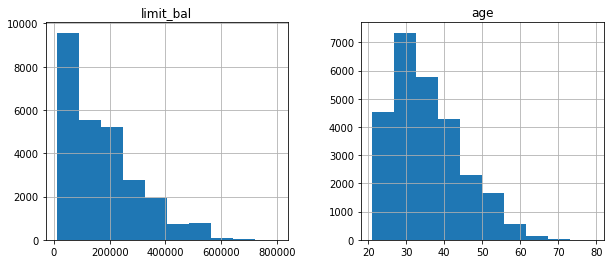

In [26]:
df_clean[['limit_bal', 'age']].hist(figsize=(10,4))

In [27]:
df_clean[['limit_bal', 'age']].describe()

,limit_bal,age
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


**limit_bal**, the credit limit, seems ok. It has a minimum of 10,000 (NT dollar - Taiwan currency). Being above zero makes sense when analyzing minimum limits.

**age** feature also looks reasonably ok, with mimium age of 21 and the maximum age of 79 years old.

Let's look ate the 'education' distribution:

In [28]:
df_clean.education.value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: education, dtype: int64

New values found in **education** column: 

The unknown values will be included in the 'others' category (value of **4**)

In [29]:
df_clean.education.replace(to_replace=[0, 6, 5], value=4, inplace=True)
df_clean.education.value_counts()

2    12458
1     9412
3     4380
4      414
Name: education, dtype: int64

Let's look ate the 'marriage' distribution:

In [30]:
df_clean.marriage.value_counts()

2    14158
1    12172
3      286
0       48
Name: marriage, dtype: int64

New values found in **marriage** column: 

The unknown values will be included in the 'others' category (value of **3**)

In [31]:
df_clean.marriage.replace(to_replace=0, value=3, inplace=True)
df_clean.marriage.value_counts()

2    14158
1    12172
3      334
Name: marriage, dtype: int64

### Exploring some relationships

Let's look at the 'education' distribution:

Text(0.5, 0, 'Education level: ordinal encoding')

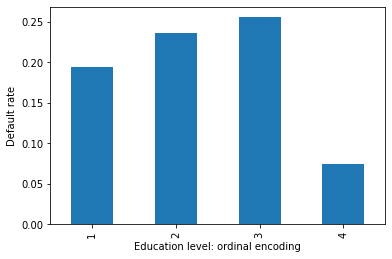

In [32]:
df_clean.groupby('education').agg({'default_payment_next_month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

Let's 'reverse engineer' the education categorical values to one hot enconding (OHE):

In [33]:
cat_map = {
    1: 'graduate_school',
    2: 'university',
    3: 'high_school',
    4: 'others'
}

df_clean['education_cat'] = 'none'
df_clean['education_cat'] = df_clean.education.map(cat_map)
df_clean[['education', 'education_cat']].head(10)

,education,education_cat
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate_school
6,1,graduate_school
7,2,university
8,3,high_school
9,3,high_school


In [34]:
edu_ohe = pd.get_dummies(df_clean.education_cat)
edu_ohe.head(10)

,graduate_school,high_school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [35]:
df_with_ohe = pd.concat([df_clean, edu_ohe], axis=1)
df_with_ohe[['education_cat', 'graduate_school', 'high_school', 'university', 'others']].head(10)

,education_cat,graduate_school,high_school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate_school,1,0,0,0
6,graduate_school,1,0,0,0
7,university,0,0,1,0
8,high_school,0,1,0,0
9,high_school,0,1,0,0


Saving the resultant dataframe for posterior analyses:

In [36]:
df_with_ohe.to_csv('data/default_of_credit_card_clients_cleaned.csv', index=False)

### Further dataset Analysis - Exploring the Financial Features

Let's read the previous saved csv file:

In [37]:
df = pd.read_csv('data/default_of_credit_card_clients_cleaned.csv')
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month,education_cat,graduate_school,high_school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [38]:
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month', 'education_cat', 'graduate_school',
       'high_school', 'others', 'university'],
      dtype='object')

In [39]:
df.shape

(26664, 30)

Let's look only at the financial features:

In [40]:
pay_feats = ['pay_{}'.format(i+1) for i in range(6)]

df[pay_feats].describe()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [41]:
df.pay_1.value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: pay_1, dtype: int64

As the number of finacial history columns is reasonable low (18 in total) it is possible to look at every one. Let's start with 'pay_1' feature: 

Text(0.5, 0, 'pay_1')

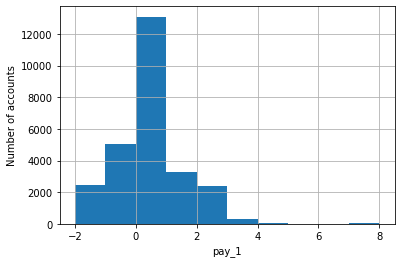

In [42]:
df.pay_1.hist()
plt.ylabel('Number of accounts')
plt.xlabel('pay_1')

Setting the bin argument manually to better visualize the data:

Text(0.5, 0, 'pay_1')

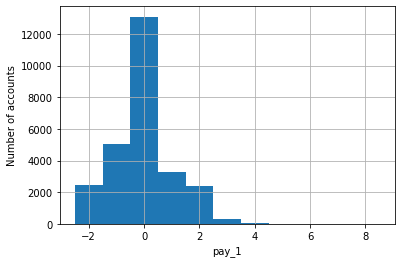

In [43]:
pay_1_bins = np.array(range(-2, 10)) - 0.5

df.pay_1.hist(bins=pay_1_bins)
plt.ylabel('Number of accounts')
plt.xlabel('pay_1')

Let's plot multiple histograms together:

array([[<AxesSubplot:title={'center':'pay_1'}>,
        <AxesSubplot:title={'center':'pay_2'}>,
        <AxesSubplot:title={'center':'pay_3'}>],
       [<AxesSubplot:title={'center':'pay_4'}>,
        <AxesSubplot:title={'center':'pay_5'}>,
        <AxesSubplot:title={'center':'pay_6'}>]], dtype=object)

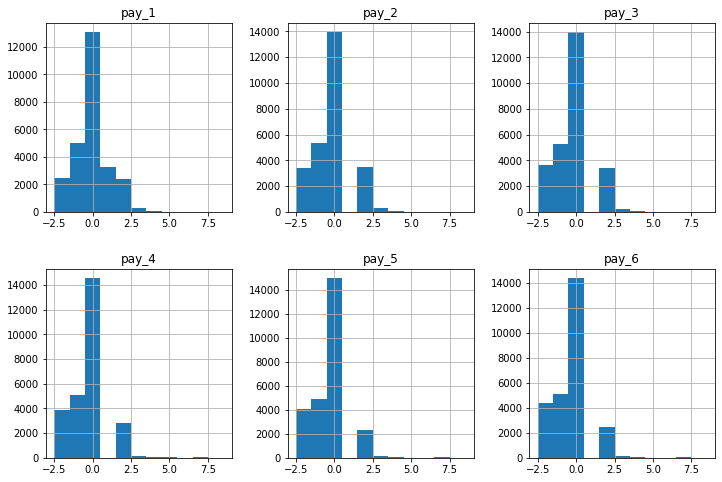

In [44]:
df[pay_feats].hist(bins=pay_1_bins, figsize=(12, 8), layout=(2, 3))

Some strange behaviour can be seen in the plots above. Considering 'pay_3' (July) and 'pay_2' (August), we can see that in July there are very few accounts that had a 1-month payment delay and in August there are almost the same number of accounts with a 2-month payment delay as was in July. This is strange because the expected behaviour is that the number of accounts with a 2-month delay in a given month should be less or equal to the number of accounts with a 1-month delay in the previous month.

Let's look in detail to these records:

In [45]:
df.loc[(df.pay_2 == 2), ['pay_2', 'pay_3']].head()

,pay_2,pay_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


Yes, the data is faulty.

Let's look at the bill and payment amounts now:

In [46]:
bill_feats = ['bill_amt{}'.format(i+1) for i in range(6)]

df[bill_feats].describecribe()

AttributeError: 'DataFrame' object has no attribute 'describecribe'

The average monthly bill amount is in the range of 40,000 to 50,000 NT dollars. It is also possible to see some negative values of bill amount and that is reasonable due to overpayment of previous months or other factors.

array([[<AxesSubplot:title={'center':'bill_amt1'}>,
        <AxesSubplot:title={'center':'bill_amt2'}>,
        <AxesSubplot:title={'center':'bill_amt3'}>],
       [<AxesSubplot:title={'center':'bill_amt4'}>,
        <AxesSubplot:title={'center':'bill_amt5'}>,
        <AxesSubplot:title={'center':'bill_amt6'}>]], dtype=object)

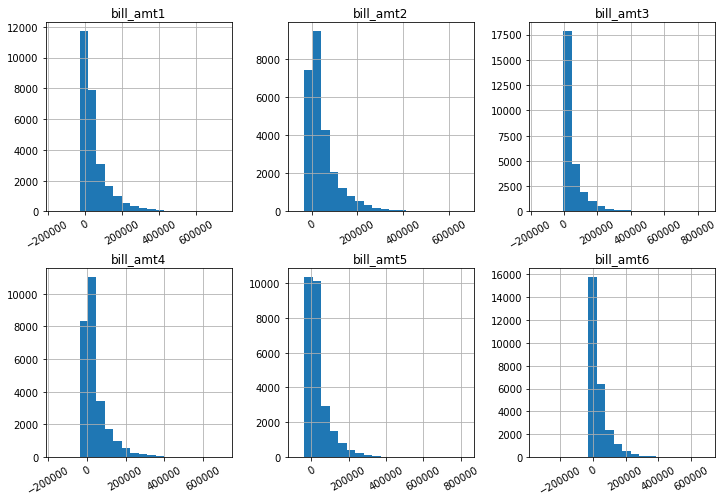

In [47]:
df[bill_feats].hist(bins=20, figsize=(12, 8), layout=(2, 3), xrot=30)

The histogram plots make sense in several aspects too. Most of the accounts have relatively small bills and as the amount increases, the account number steadily decreases. The distribution of payments is similar month-by-month so any data inconsistency is noticed between them.

In [48]:
pay_amt_feats = ['pay_amt{}'.format(i+1) for i in range(6)]

df[pay_amt_feats].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


The average payment is an order of magnitude (power of 10) lower than the average bill amounts. This supports the data that most of the payments have status 0 (that they honored the credit payment). There are no negative payment values and this is good. 

array([[<AxesSubplot:title={'center':'pay_amt1'}>,
        <AxesSubplot:title={'center':'pay_amt2'}>,
        <AxesSubplot:title={'center':'pay_amt3'}>],
       [<AxesSubplot:title={'center':'pay_amt4'}>,
        <AxesSubplot:title={'center':'pay_amt5'}>,
        <AxesSubplot:title={'center':'pay_amt6'}>]], dtype=object)

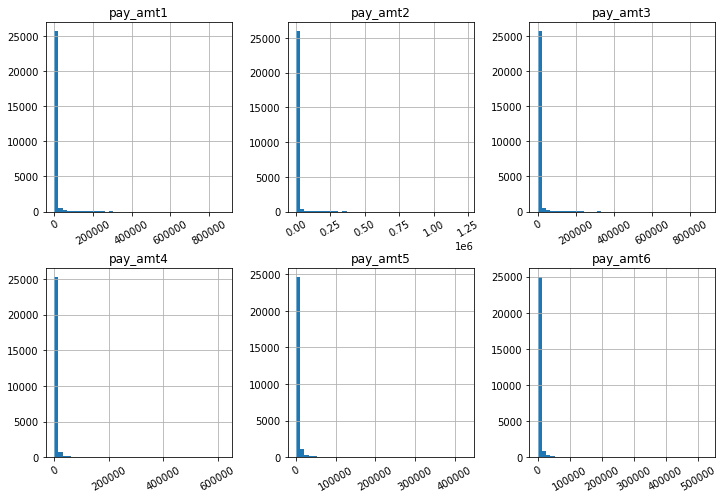

In [49]:
df[pay_amt_feats].hist(bins=40, figsize=(12, 8), layout=(2,3), xrot=30)

Looking at the plots above it is hard to grasp any information. Only that the bin that include 0 is the most frequent value. 

Let's see how many values are zero indeed:

In [50]:
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.sum()

pay_amt1    4656
pay_amt2    4833
pay_amt3    5293
pay_amt4    5697
pay_amt5    5981
pay_amt6    6373
dtype: int64

Only a portion of accounts have bill payments equal to 0 in any given month - roughly around 20-25%. So the histrogram plots are in some way misleading information. This happens because the way bins are grouped together.

Let's ignore the payments with zero values and only consider the other values:

array([[<AxesSubplot:title={'center':'pay_amt1'}>,
        <AxesSubplot:title={'center':'pay_amt2'}>,
        <AxesSubplot:title={'center':'pay_amt3'}>],
       [<AxesSubplot:title={'center':'pay_amt4'}>,
        <AxesSubplot:title={'center':'pay_amt5'}>,
        <AxesSubplot:title={'center':'pay_amt6'}>]], dtype=object)

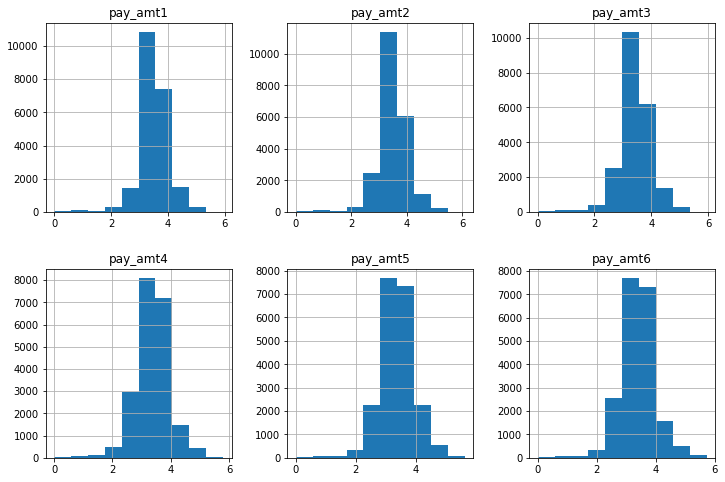

In [51]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(figsize=(12,8), layout=(2,3))

The log transformation was used to smooth the scale difference in the payment monthly values - accordingly to the summary statistics, orders of magnitude of difference from 25th to 75th percetiles - and help the visualization.

The results now are more effective and informative. We can see that the most commons payment amounts are 1,000 ($10^3$; $\log_{10}(1000) = 3$). There are some pretty small payments as well as some few large ones. The overall distribution is consistent from month to month.